In this notebook, we'll explore time series data from the stock market, focusing on some major technology companies—APPLE, GOOGLE, Tesla, NVIDIA, AMD, We'll leverage the yfinance library to retrieve stock information, and visualize different aspects using Seaborn and Matplotlib. Additionally, we will analyze the risk associated with a stock based on its historical performance. Finally, we will forecast future stock prices using a Long Short Term Memory (LSTM) model.

Throughout this process, we'll address the following key questions:

How has the stock price changed over time?
What is the average daily return of the stock?
What is the moving average for these stocks?
What is the correlation between different stocks?
What is the value at risk (VaR) when investing in a particular stock?
How can we predict future stock movements? (We will forecast Apple's closing stock price using an LSTM model.)

# 1. How did the stock price fluctuate over time?

In this section, we will discuss how to use pandas to request stock data and analyze fundamental stock price movements.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
symbols = ['AAPL', 'GOOG', 'TSLA', 'NVDA', 'AMD']
company_names = ["APPLE", "GOOGLE", "Tesla", "NVIDIA", "AMD"]
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

dataframes = [
    yf.download(symbol, start=start, end=end).assign(company_name=name)
    for symbol, name in zip(symbols, company_names)
]

df = pd.concat(dataframes, axis=0)
df.tail(10)

Note: 'info' dict is now fixed & improved, 'fast_info' no longer faster
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-11-21,138.869995,140.279999,134.929993,137.490005,137.490005,29311400,AMD
2024-11-22,137.350006,139.130005,137.039993,138.350006,138.350006,21784700,AMD
2024-11-25,140.490005,142.350006,139.050003,141.130005,141.130005,30923100,AMD
2024-11-26,142.550003,142.800003,136.619995,137.720001,137.720001,32092400,AMD
2024-11-27,137.199997,137.940002,132.960007,136.240005,136.240005,30175300,AMD
2024-11-29,136.240005,138.589996,135.779999,137.179993,137.179993,16085700,AMD
2024-12-02,137.919998,142.820007,137.800003,142.059998,142.059998,33102400,AMD
2024-12-03,142.580002,143.449997,141.080002,141.979996,141.979996,22665300,AMD
2024-12-04,142.960007,144.119995,141.179993,143.990005,143.990005,25942700,AMD


# Stock Performance of Five Tech Companies Over the Last Decade

The table below presents the stock price data for five leading technology companies over the past ten years. The companies included in the analysis are APPLE, GOOGLE, Tesla, NVIDIA, AMD. This data reflects how these companies have performed in terms of their stock price fluctuations and market trends.
This data shows the general growth trend in the stock prices of these major tech companies, with periods of significant increase and market corrections over the decade. Each company has experienced substantial growth, though with varying degrees of volatility. 


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2014-12-08,28.525000,28.662500,27.905001,28.100000,25.030844,230659600,APPLE
2014-12-09,27.547501,28.575001,27.337500,28.530001,25.413877,240832000,APPLE
2014-12-10,28.602501,28.712500,27.885000,27.987499,24.930628,178261200,APPLE
2014-12-11,28.065001,28.450001,27.834999,27.905001,24.857140,165606800,APPLE
2014-12-12,27.615000,27.967501,27.395000,27.432501,24.436247,224112400,APPLE
...,...,...,...,...,...,...,...
2024-11-29,136.240005,138.589996,135.779999,137.179993,137.179993,16085700,AMD
2024-12-02,137.919998,142.820007,137.800003,142.059998,142.059998,33102400,AMD
2024-12-03,142.580002,143.449997,141.080002,141.979996,141.979996,22665300,AMD


In [4]:
for  company_name in company_names:
    print('---------------------{}------------------------'.format(company_name))
    print(df[df['company_name']==company_name].describe())

---------------------APPLE------------------------
              Open         High          Low        Close    Adj Close  \
count  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000   
mean     94.833687    95.842884    93.890389    94.915738    92.815451   
std      64.219685    64.884124    63.608919    64.289088    64.752729   
min      22.500000    22.917500    22.367500    22.584999    20.697266   
25%      36.792500    37.122501    36.452499    36.877499    34.503033   
50%      64.672501    65.777496    64.212502    65.434998    63.438091   
75%     151.119995   153.169998   149.820007   151.279999   149.497879   
max     243.990005   244.630005   242.130005   244.419998   244.419998   

             Volume  
count  2.517000e+03  
mean   1.180047e+08  
std    6.864734e+07  
min    6.096199e+06  
25%    7.159840e+07  
50%    1.013268e+08  
75%    1.433156e+08  
max    6.488252e+08  
---------------------GOOGLE------------------------
              Open         High 

### **Apple Stock Historical Price Statistics**

### 1. **Price Distribution**:
   - **Open, High, Low, and Close Prices**:
     - The mean of the data is roughly between $91 and $93, indicating the average price range of Apple stock during this period.
     - The standard deviation is approximately $62 to $63, suggesting relatively large price fluctuations. Apple's stock price experienced significant volatility.
     - The minimum value is approximately $22.50, which is likely the historical low during this period, while the maximum value is $236.48, representing the historical high.
     - Median (50%): The median for open, high, low, and close prices is $59.09, $59.89, $58.62, and $59.08 respectively, indicating that the stock price was mostly within the $58 to $60 range.
     - Quartiles:
       - **25%**: The lower quartile of prices is around $35 to $36, indicating that 25% of the time the price was within this range or lower.
       - **75%**: The upper quartile of prices is around $149 to $151, indicating that 25% of the time the price was within this range or higher.

### 2. **Trading Volume Distribution**:
   - The mean trading volume is approximately 119.8 million shares, indicating very high daily trading volume of Apple stock over this period.
   - The standard deviation is 68.76 million shares, suggesting that trading volumes also fluctuated significantly, with some days experiencing particularly high volumes.
   - The minimum volume is 24.04 million shares, representing the lowest trading day, while the maximum volume is 648.8 million shares, possibly reflecting significant events or announcements.
   - Quartiles:
     - **25%**: Approximately 73.63 million shares, indicating that 25% of the time the volume was below this level.
     - **50% (Median)**: Approximately 102.7 million shares, indicating that half the time the volume was above or below this value.
     - **75%**: Approximately 146.1 million shares, indicating the upper quartile of trading volume, meaning that 25% of the time the volume exceeded this value.

### 3. **Adjusted Closing Price**:
   - The statistics for adjusted closing prices are similar to closing prices but slightly lower, with a mean of $90.24, reflecting the impact of dividends or stock splits on the stock price.

### 4. **Summary**:
   - **Significant Price Volatility**: Apple's stock price experienced notable fluctuations, ranging from $22.50 up to over $236, with a large standard deviation indicating intense price movements.
   - **Active Trading Volume**: Apple's trading volume was very active during this period, with an average daily volume exceeding 100 million shares, and peak volumes exceeding 600 million shares.
   - The data distribution indicates clear troughs and peaks in different periods for Apple stock, reflecting significant market attention and reaction to the stock.

---

### **Google Stock Historical Price Statistics**

#### 1. **Price Distribution**:
   - **Open, High, Low, and Close Prices**:
     - The mean of the data is roughly between $79 and $80, indicating the average price range of Google stock during this period.
     - The standard deviation is approximately $42 to $43, indicating noticeable price fluctuations but less dramatic than Tesla and NVIDIA.
     - The minimum value is about $24.66 (open price), reflecting a lower price range historically, while the maximum value is $192.66, indicating a historical high.
     - Median: The median for open, high, low, and close prices is within the $61 to $62 range, showing that the price remained at this level for most of the period.
     - Quartiles:
       - **25%**: The lower quartile of prices is around $43, indicating that 25% of the time the price was below this level.
       - **75%**: The upper quartile of prices is between $116 and $118, indicating that 25% of the time the price was within this range or higher.

#### 2. **Trading Volume Distribution**:
   - The mean trading volume is approximately 31.07 million shares, indicating relatively stable daily trading volume for Google stock.
   - The standard deviation is 15.38 million shares, reflecting less significant volume fluctuations compared to other companies.
   - The minimum trading volume is 6.936 million shares, indicating lower volume on some days when the market was more calm. The maximum trading volume is 223 million shares, possibly related to major market events or company news releases.
   - Quartiles:
     - **25%**: Trading volume of 21.45 million shares, indicating that 25% of the time the volume was below this level.
     - **50% (Median)**: Trading volume of 27.26 million shares, representing approximately half the time the volume fluctuated around this value.
     - **75%**: Trading volume of 36.11 million shares, indicating higher volume times accounted for 25%.

#### 3. **Adjusted Closing Price**:
   - The adjusted closing price of Google stock is very close to the closing price, with a mean of $79.68, indicating minimal impact of dividends on the stock price.

#### 4. **Summary**:
   - **Moderate Price Volatility**: Google's stock price showed moderate fluctuations, with peaks but overall relatively stable performance.
   - **Stable Trading Volume**: Google's trading volume was relatively steady across all datasets, not showing drastic volume fluctuations, which may reflect investors' steady confidence in Google.
   - The price rose from a low of $24 to over $192, demonstrating an upward trend in stock price over the period.

---

### **Tesla Stock Historical Price Statistics**

#### 1. **Price Distribution**:
   - **Open, High, Low, and Close Prices**:
     - Tesla's stock price showed the most extreme fluctuations, with a mean roughly between $106 and $111, significantly higher than other companies.
     - The standard deviation is approximately $109 to $112, indicating extremely significant price fluctuations for Tesla stock.
     - The minimum value is approximately $9.49, reflecting very low early prices, while the maximum value is $411.47, representing Tesla's stock performance at market peaks.
     - Quartiles:
       - **25%**: The lower quartile of prices is approximately $16.79, indicating that 25% of the time the price was relatively low.
       - **75%**: The upper quartile of prices is approximately $215.47, showing Tesla's stock performance during market highs.

#### 2. **Trading Volume Distribution**:
   - Tesla's trading volume is also quite high, with an average trading volume of 112 million shares, and its maximum trading volume reaching 914 million shares, far exceeding other stocks, reflecting high market attention to this stock.
   - The minimum trading volume is 10.62 million shares, indicating relatively high low-volume days compared to other companies' lows.

#### 3. **Adjusted Closing Price**:
   - The adjusted closing price of Tesla stock does not differ significantly from the actual closing price, with a mean of $109.27, suggesting minimal impact of dividends on the price.

#### 4. **Summary**:
   - **Significant Price Fluctuations**: Tesla's stock price showed the widest range of fluctuations among all companies, possibly related to the company's rapid growth and market focus on electric vehicles.
   - **High Volume and Active Market**: Tesla's trading volume is significantly higher than other companies, indicating high market appeal as an innovative technology company.
   - The price rose from $9 to over $400, showing significant growth trends.

---

### **NVIDIA Stock Historical Price Statistics**

#### 1. **Price Distribution**:
   - **Open, High, Low, and Close Prices**:
     - The mean of NVIDIA stock is approximately $18, relatively low prices but with significant fluctuations, with a standard deviation of approximately $27 to $28, indicating that NVIDIA's stock price also experienced considerable volatility during this period.
     - The maximum value is approximately $142.91, while the minimum value is only $0.45, possibly reflecting the company's early low price trough and subsequent market prosperity.

#### 2. **Trading Volume Distribution**:
   - The average trading volume of NVIDIA stock is as high as 468 million shares, second only to Tesla.
   - The maximum trading volume reached 3.693 billion shares, reflecting strong market demand for the company's products (especially AI and graphics processing technologies).

#### 3. **Summary**:
   - **Significant Price Fluctuations**: NVIDIA's stock price showed extensive fluctuations, reflecting the volatility of market demand.
   - **High Volume**: NVIDIA's trading volume is very high, possibly due to its leadership in the AI and semiconductor industry.

---

### **AMD Stock Historical Price Statistics**

#### 1. **Price Distribution**:
   - **Open, High, Low, and Close Prices**:
     - The mean of AMD stock is approximately $55 to $57, relatively moderate prices within tech stocks.
     - The standard deviation is $51 to $52, indicating significant price fluctuations.
     - The maximum value is $213.41, representing a high price during market prosperity, while the minimum value is $1.62, possibly reflecting earlier lower market performance.

#### 2. **Trading Volume Distribution**:
   - Average trading volume is 57.48 million shares, showing high attention in the semiconductor market for AMD.
   - The maximum trading volume is 325 million shares, lower compared to larger companies but still indicating market activity.

#### 3. **Summary**:
   - **Significant Volatility**: AMD stock experienced significant price fluctuations, reflecting intense competition and technological innovation in the semiconductor market.
   - **Active Market**: Although trading volume is not as high as Tesla and NVIDIA, it still shows competitiveness as a chip manufacturer in the market.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12582 entries, 2014-12-08 to 2024-12-05
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          12582 non-null  float64
 1   High          12582 non-null  float64
 2   Low           12582 non-null  float64
 3   Close         12582 non-null  float64
 4   Adj Close     12582 non-null  float64
 5   Volume        12582 non-null  int64  
 6   company_name  12582 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 786.4+ KB


## Closing Price

The closing price refers to the final price at which a stock is traded during the regular trading session. Investors typically use the closing price as a key reference point for monitoring the stock's performance over time.

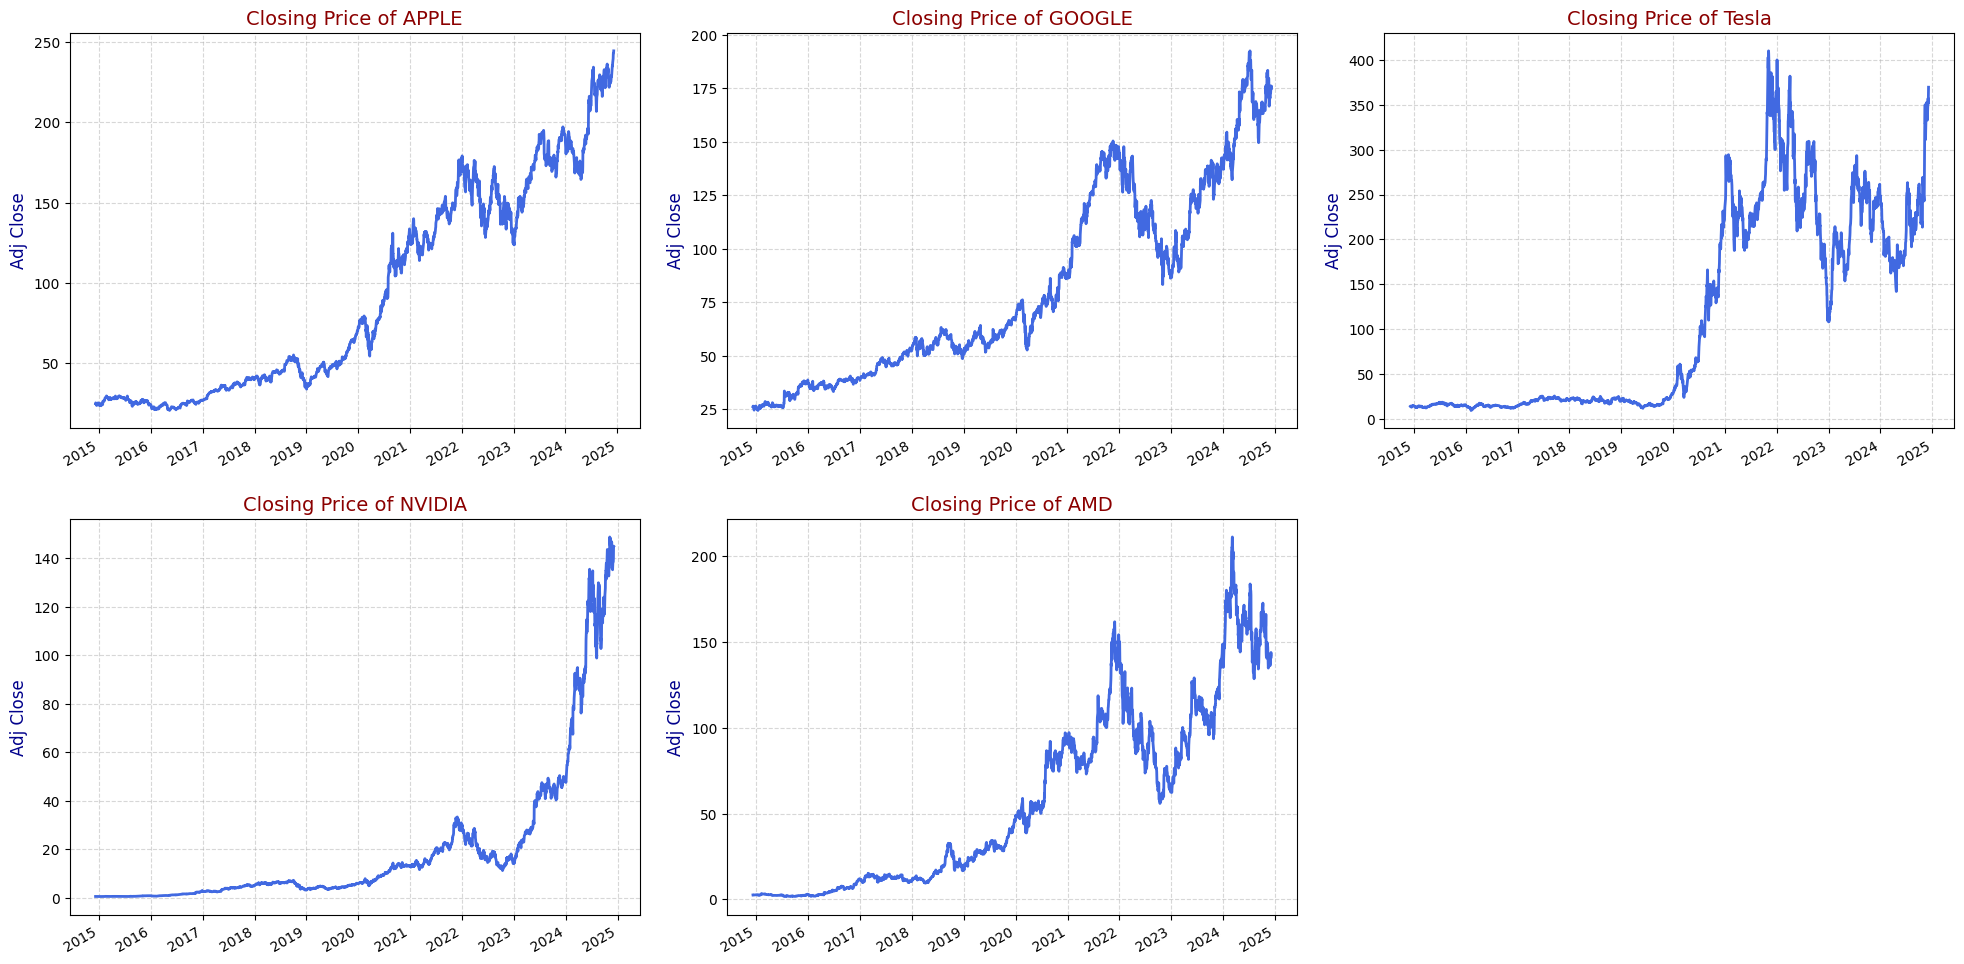

In [6]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=0.9, bottom=0.1)
for i, company_name in enumerate(company_names, 1):
    plt.subplot(2, 3, i)
    df[df['company_name'] == company_name]['Adj Close'].plot(linewidth=2, color='royalblue')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.ylabel('Adj Close', fontsize=12, color='darkblue')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_names[i - 1]}", fontsize=14, color='darkred')

plt.tight_layout(pad=2.0)


## Sales Volume
Sales volume refers to the quantity of an asset or security traded within a specific period, typically within a day. For example, stock trading volume represents the number of shares exchanged between the market's opening and closing. Volume and its fluctuations over time are critical factors for technical traders.

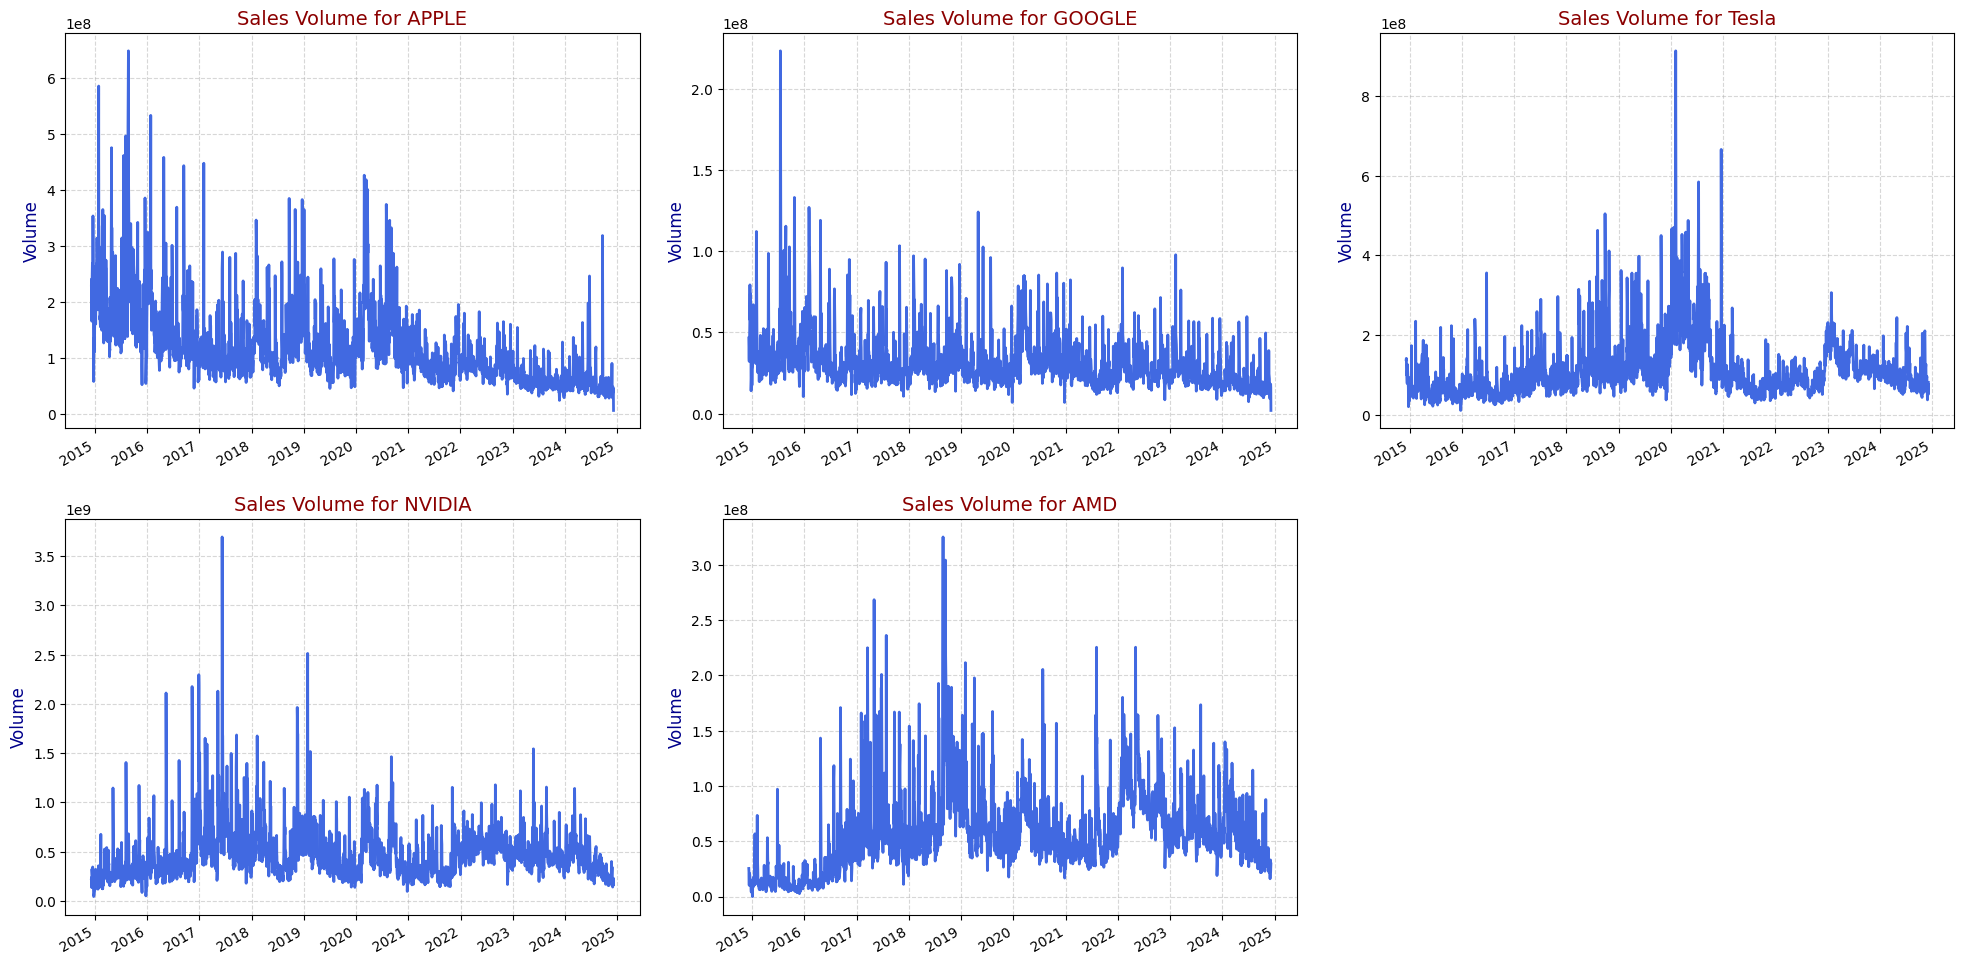

In [7]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=0.9, bottom=0.1)
for i, company_name in enumerate(company_names, 1):
    plt.subplot(2, 3, i)
    df[df['company_name'] == company_name]['Volume'].plot(linewidth=2, color='royalblue')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.ylabel('Volume', fontsize=12, color='darkblue')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_names[i - 1]}", fontsize=14, color='darkred')

plt.tight_layout(pad=2.0)

Now let's proceed to calculate the stock's moving average.

# 2. What were the moving averages of different stocks?

The moving average (MA) is a basic tool in technical analysis that helps smooth price data by calculating an ongoing average price. This average is computed over a defined time frame, such as 10 days, 20 minutes, 30 weeks, or any period chosen by the trader.

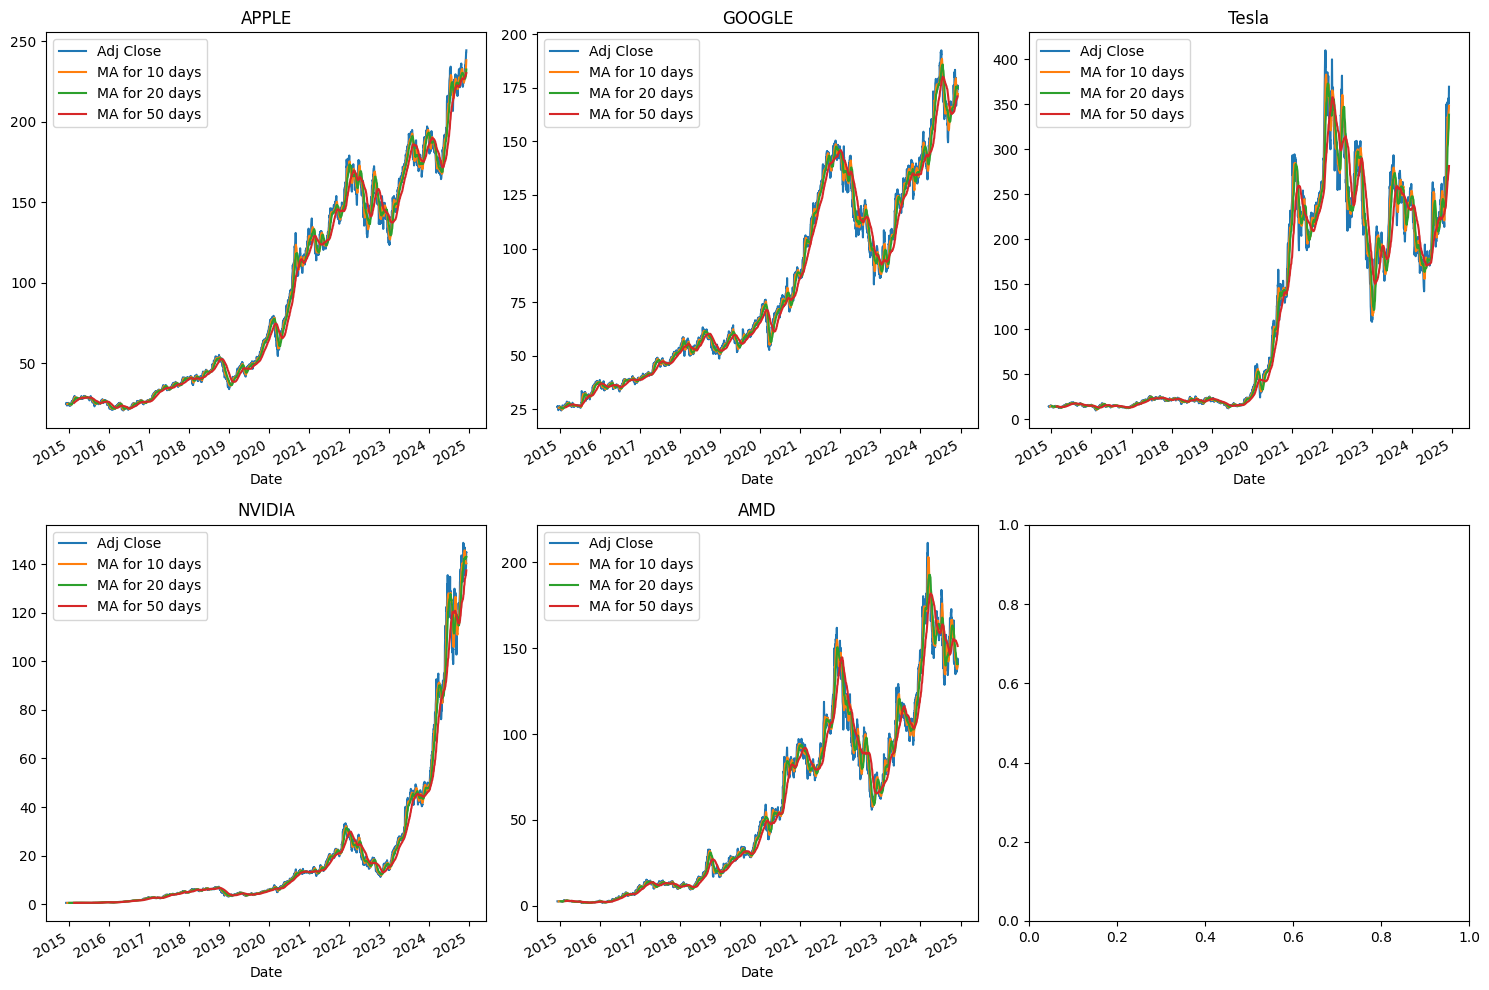

In [8]:
ma_day = [10, 20, 50]


APPLE = df[df['company_name'] == 'APPLE']
GOOGLE = df[df['company_name'] == 'GOOGLE']
Tesla = df[df['company_name'] == 'Tesla']
NVIDIA = df[df['company_name'] == 'NVIDIA']
AMD = df[df['company_name'] == 'AMD']
cmps = {
    'APPLE': APPLE,
    'GOOGLE': GOOGLE,
    'Tesla': Tesla,
    'NVIDIA': NVIDIA,
    'AMD': AMD
}

for ma in ma_day:
    for company, data in cmps.items():
        column_name = f"MA for {ma} days"
        cmps[company][column_name] = data['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(15)

companies = list(cmps.keys())
for i, company in enumerate(companies):
    row = i // 3 
    col = i % 3  

    cmps[company][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[row, col])
    axes[row, col].set_title(company)
fig.tight_layout()
plt.show()



- Use **10-day MA** for short-term price movement tracking.
- Use **20-day MA** for medium-term trends.
- Use **50-day MA** for long-term trend analysis.

# 3. What was the stock's average daily return?

In this section, we'll explore how to calculate the stock's average daily return using pandas.

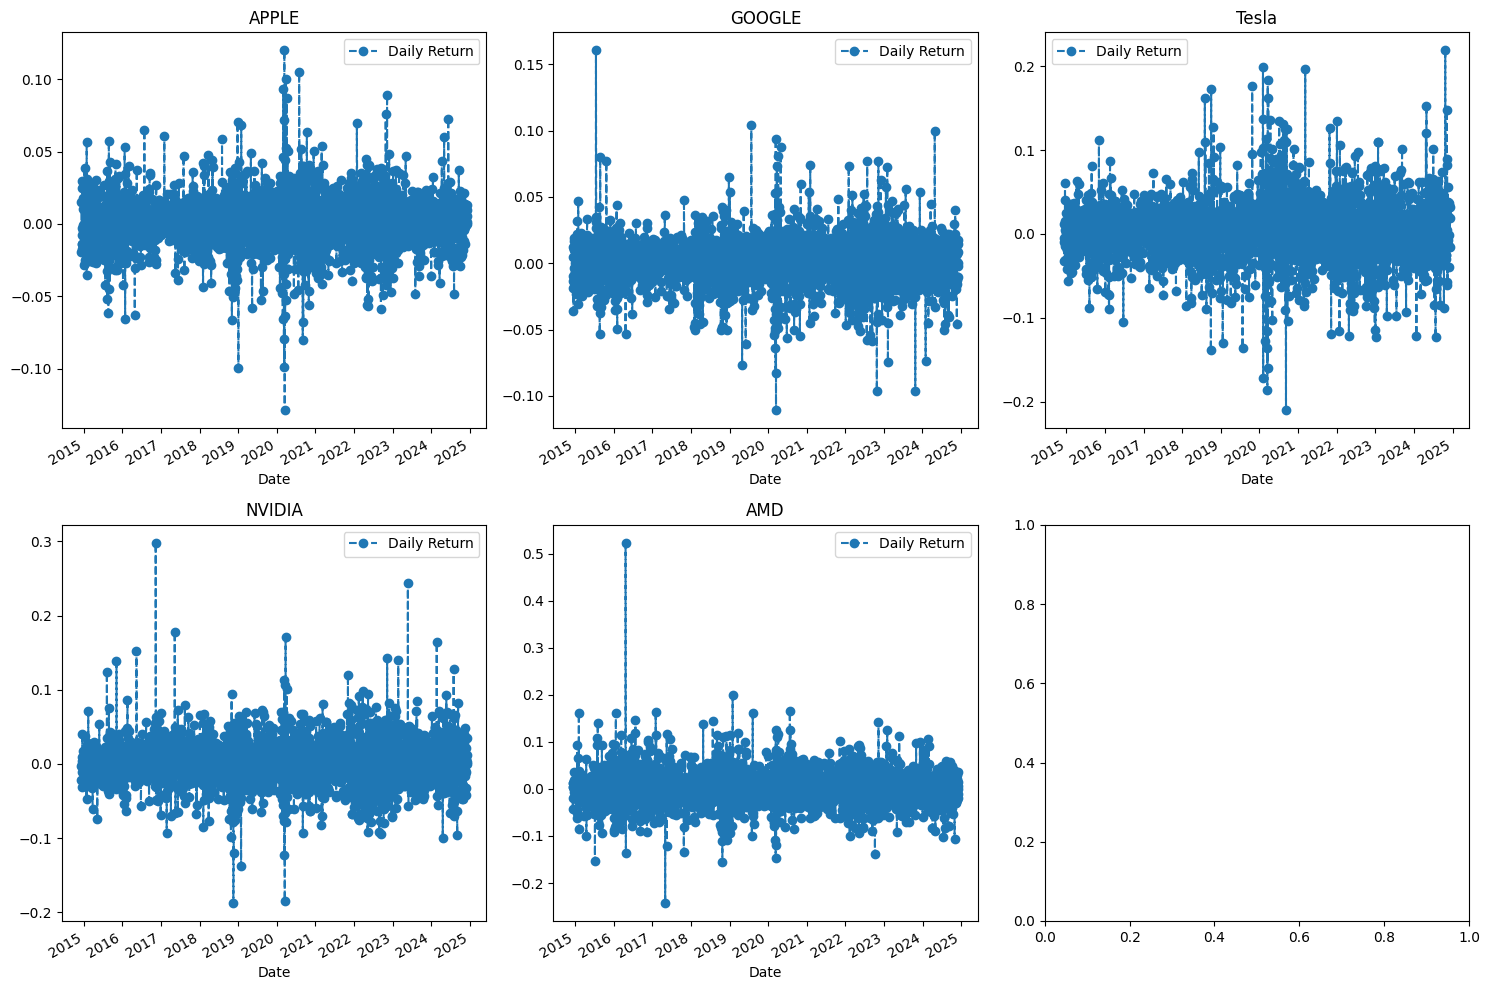

In [9]:
for company, data in cmps.items():
    cmps[company]['Daily Return'] = data['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(15)

companies = list(cmps.keys())
for i, company in enumerate(companies):
    row = i // 3  
    col = i % 3   

    cmps[company][['Daily Return']].plot(ax=axes[row, col], legend=True, linestyle='--', marker='o')
    axes[row, col].set_title(company)

fig.tight_layout()
plt.show()


Start by examining the average daily return with a visual overview. We'll use seaborn to generate a histogram combined with a KDE plot in the same figure.

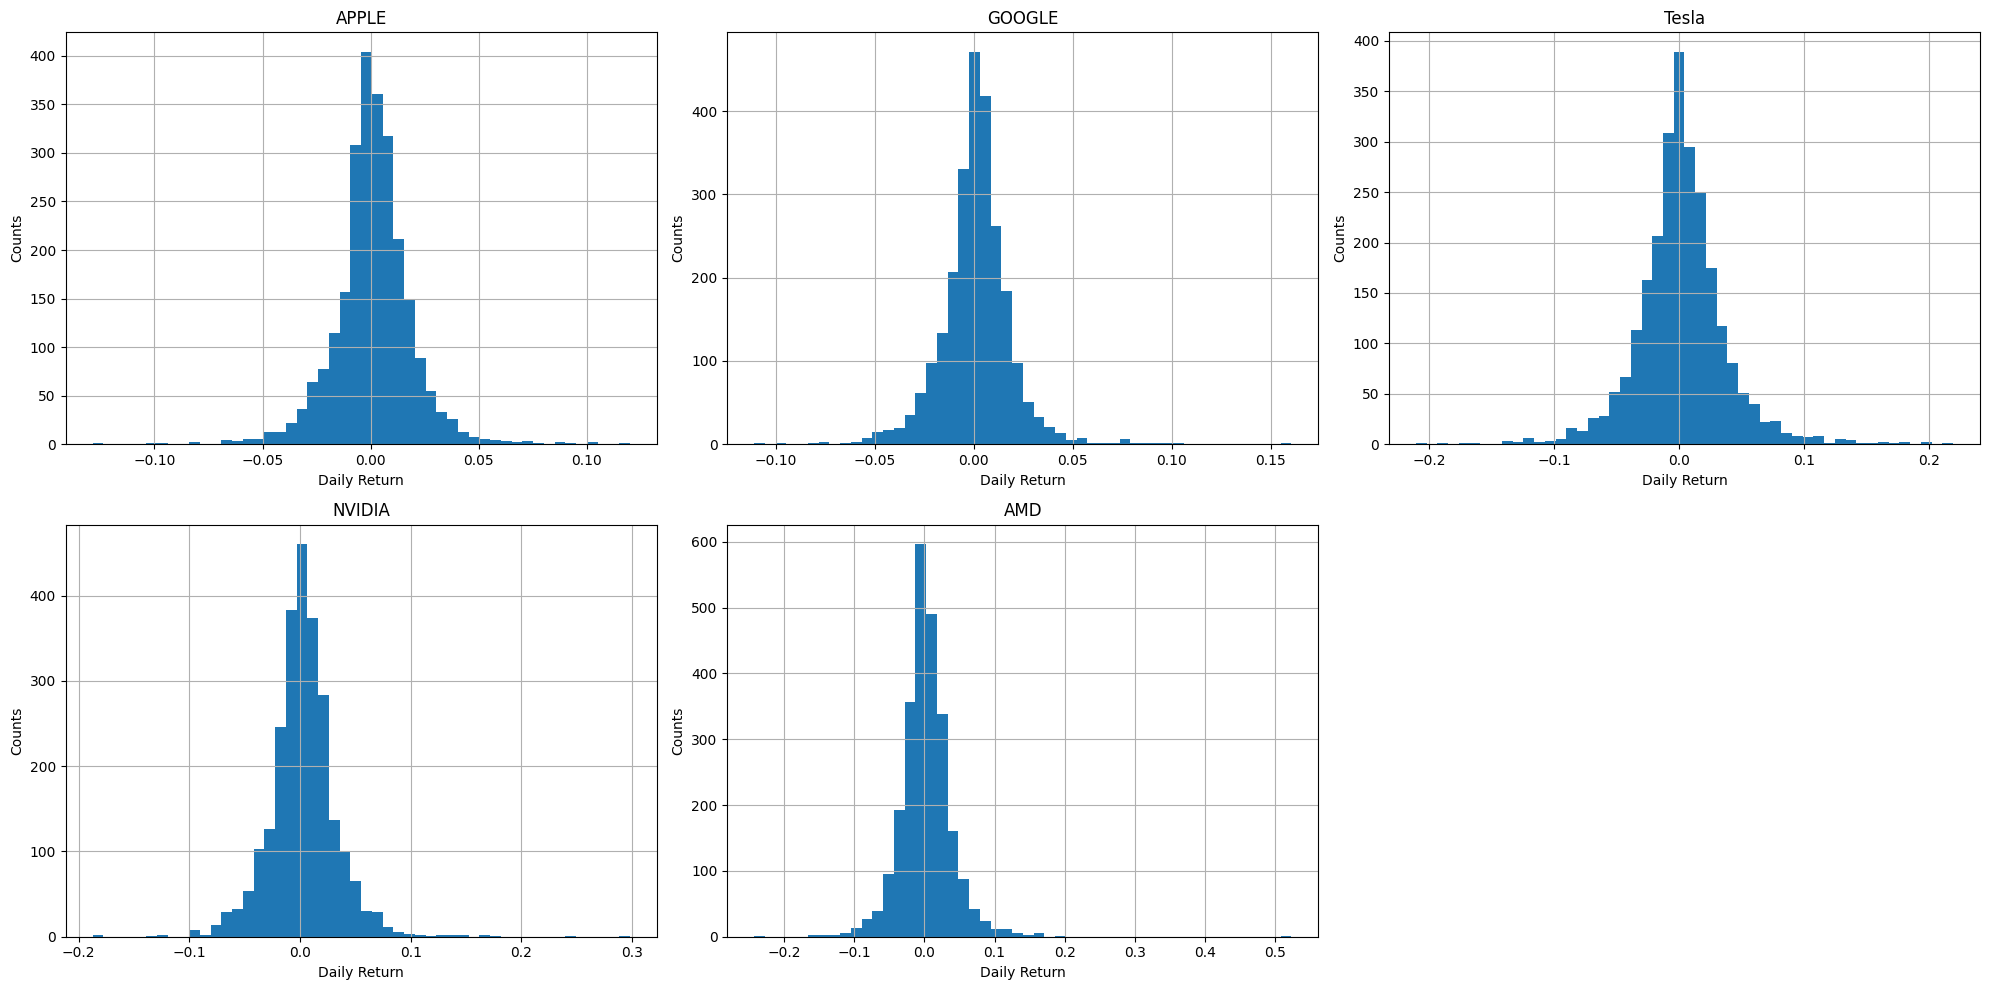

In [10]:
plt.figure(figsize=(20, 10))

bins = 50

for i, (company_name, data) in enumerate(cmps.items(), 1):
    plt.subplot(2, 3, i)  
    data['Daily Return'].hist(bins=bins)  
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name}')

plt.tight_layout()

# 4. How were the closing prices of different stocks correlated?

In this section, we’ll explore the relationship between the closing prices of various stocks and analyze their correlation. Correlation is a metric that quantifies the extent to which two variables move in relation to one another, with a value ranging between -1.0 and +1.0.

In [11]:

closing_df = yf.download(symbols, start=start, end=end)['Adj Close']

symbol_to_name = dict(zip(symbols, company_names))
closing_df.rename(columns=symbol_to_name, inplace=True)

print(closing_df.tail(10))

returns_df = closing_df.pct_change()
print(returns_df.head())


[*********************100%***********************]  5 of 5 completed
                 APPLE         AMD      GOOGLE      NVIDIA       Tesla
Date                                                                  
2024-11-21  228.520004  137.490005  169.240005  146.659897  339.640015
2024-11-22  229.869995  138.350006  166.570007  141.940216  352.559998
2024-11-25  232.869995  141.130005  169.429993  136.010635  338.589996
2024-11-26  235.059998  137.720001  170.619995  136.910568  338.230011
2024-11-27  234.929993  136.240005  170.820007  135.330673  332.890015
2024-11-29  237.330002  137.179993  170.490005  138.240479  345.160004
2024-12-02  239.589996  142.059998  172.979996  138.620453  357.089996
2024-12-03  242.649994  141.979996  173.020004  140.250336  351.420013
2024-12-04  243.009995  143.990005  176.089996  145.130005  357.929993
2024-12-05  243.039993  141.360001  174.309998  145.059998  369.489990
               APPLE       AMD    GOOGLE    NVIDIA     Tesla
Date              

In [12]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,APPLE,AMD,GOOGLE,NVIDIA,Tesla
Date,,,,,
2014-12-08,NaN,NaN,NaN,NaN,NaN
2014-12-09,0.015303,0.003876,0.012126,-0.003365,0.011803
2014-12-10,-0.019015,-0.042471,-0.013705,-0.022190,-0.032505
2014-12-11,-0.002948,0.004032,0.004334,-0.000493,-0.004575
2014-12-12,-0.016933,0.012048,-0.018322,-0.031096,-0.009000


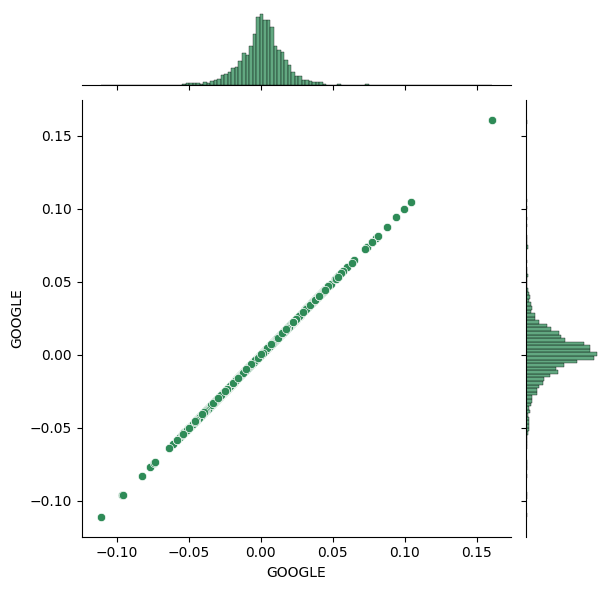

In [13]:
sns.jointplot(x='GOOGLE', y='GOOGLE', data=tech_rets, kind='scatter', color='seagreen')

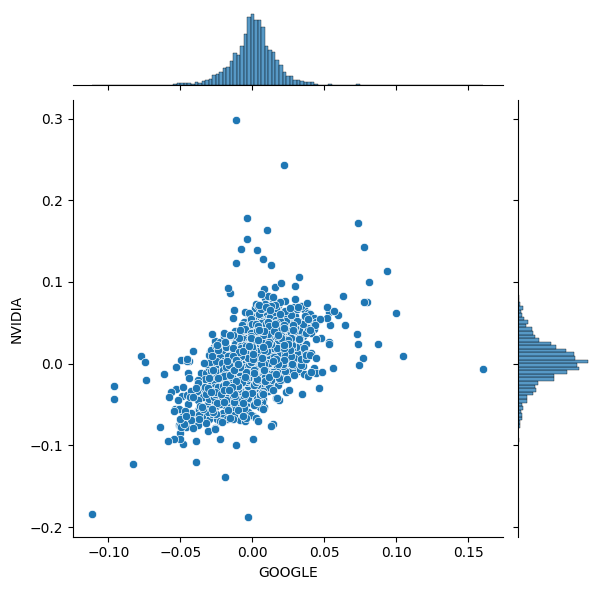

In [14]:
sns.jointplot(x='GOOGLE', y='NVIDIA', data=tech_rets, kind='scatter')

As we can observe, if two stocks have a perfect positive correlation, a linear relationship will exist between their daily returns. 

With Seaborn and pandas, it's straightforward to perform this comparison across all possible pairs of stocks in our technology stock ticker list. The `sns.pairplot()` function allows us to generate these plots automatically.

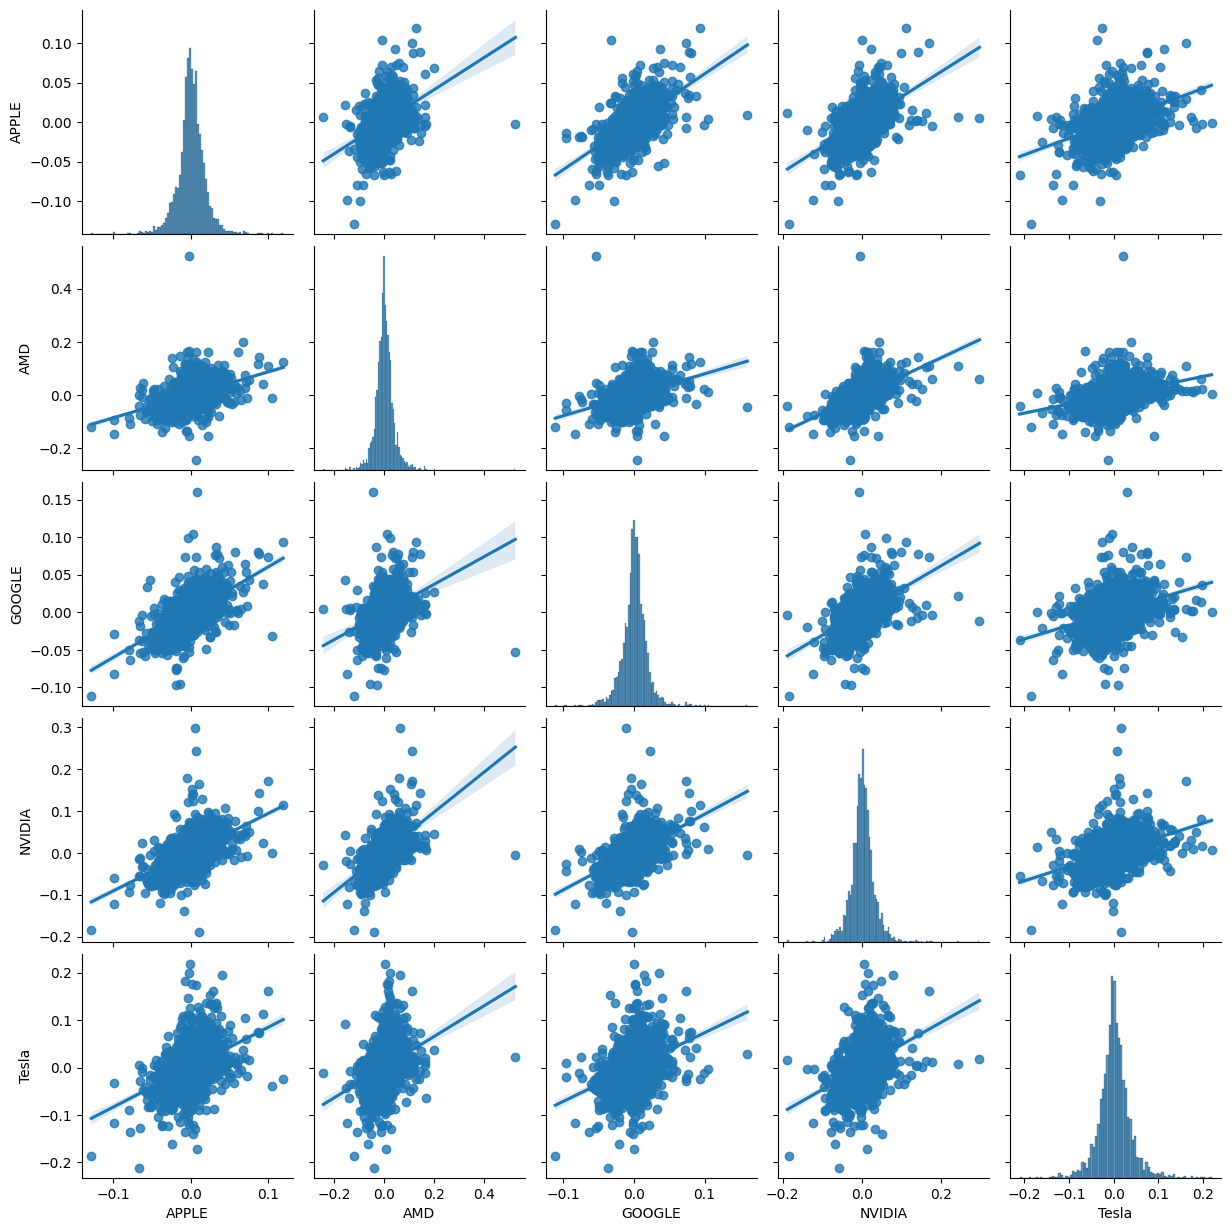

In [15]:
sns.pairplot(tech_rets, kind='reg')

The chart above shows the relationships in daily returns across all the stocks.

Although using `sns.pairplot()` is straightforward and convenient, `sns.PairGrid()` offers more flexibility, allowing full control over the figure. With `PairGrid()`, you can customize the types of plots used in the diagonal, upper triangle, and lower triangle. Here’s an example of how to harness the full potential of seaborn to achieve this.

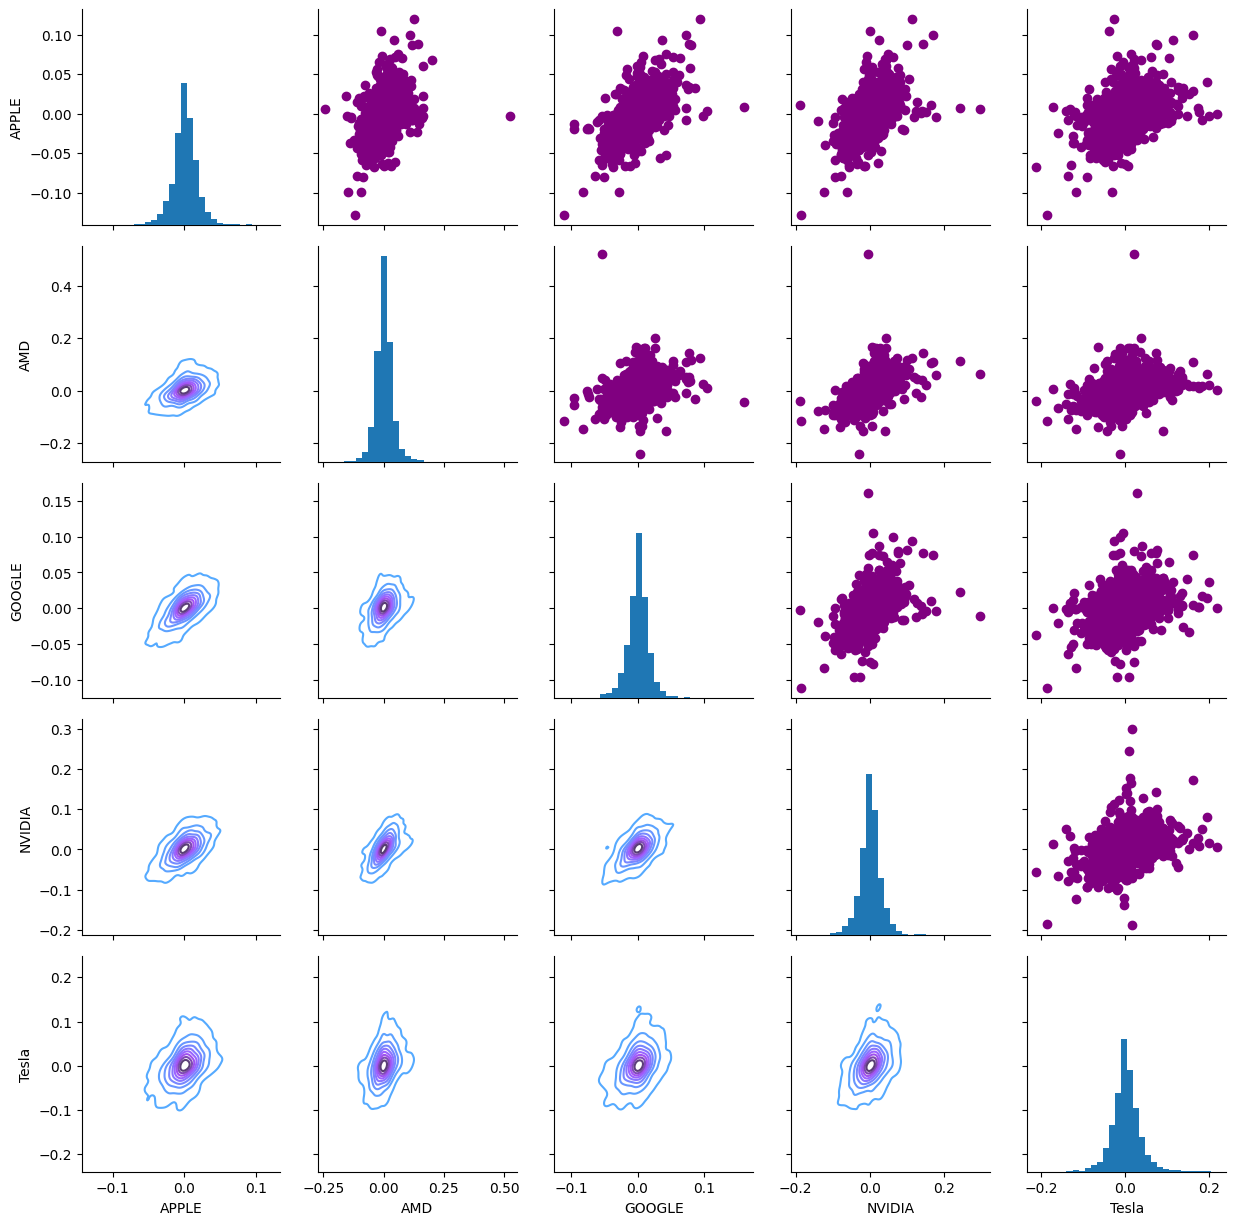

In [16]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

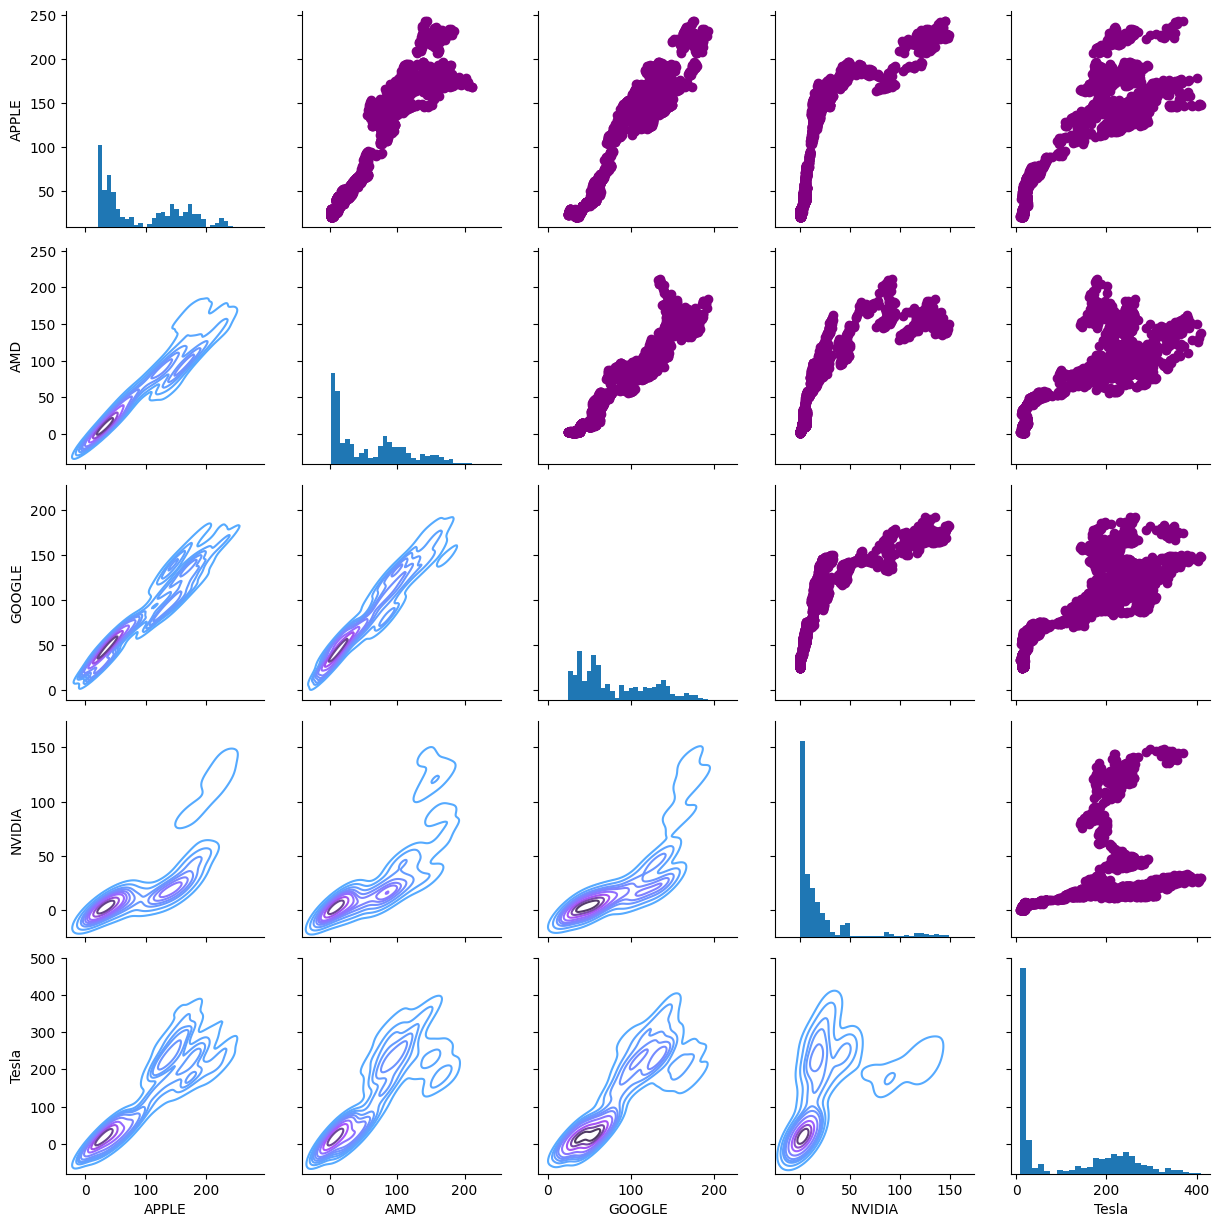

In [17]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

Begin calculating the exact numerical correlation between the daily returns of stocks, and compare them based on their closing prices.

Text(0.5, 1.0, 'Correlation of stock closing price')

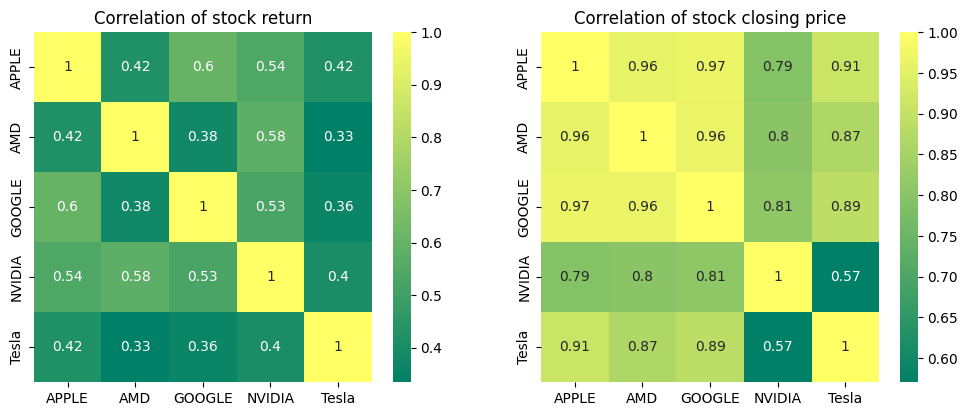

In [18]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Tesla's return and closing price performance are more independent than other stocks

# 5. What are the value risks you face when investing in specific stocks?
We can use the daily percentage return information we collect to compare expected returns to the standard deviation of daily returns.

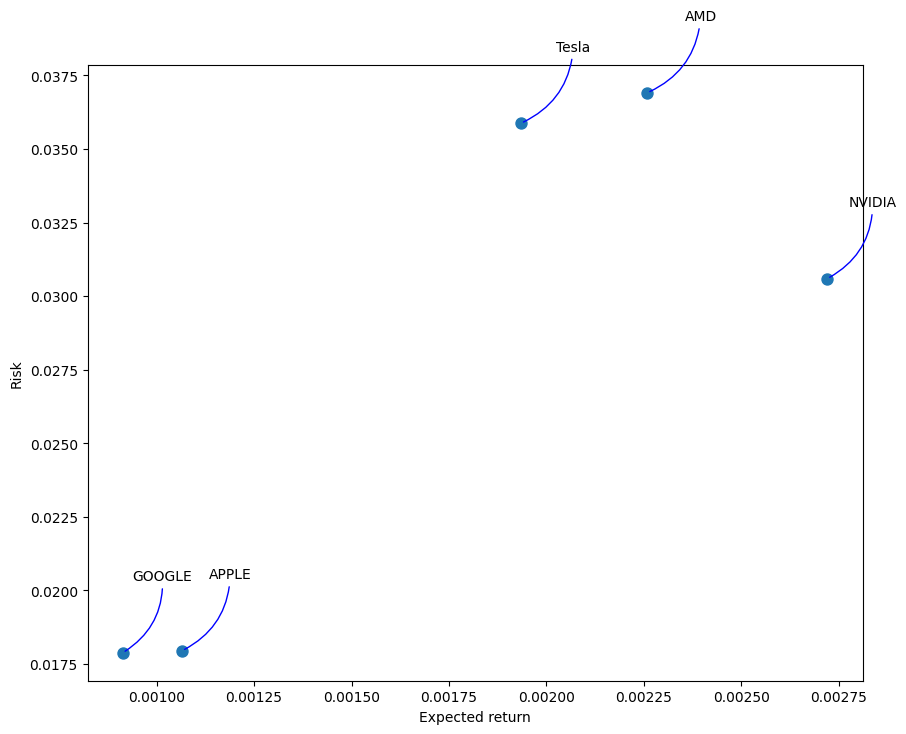

In [19]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

#### LSTM model

# 6. Forecast stock closing prices：

In [20]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler


In [21]:
df = yf.download('NVDA', start=datetime(end.year - 10, end.month, end.day), end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-08,0.526000,0.531250,0.515750,0.520000,0.499224,226944000
2014-12-09,0.516750,0.519500,0.509000,0.518250,0.497544,239448000
2014-12-10,0.516750,0.518750,0.506250,0.506750,0.486504,204364000
2014-12-11,0.509750,0.513250,0.505500,0.506500,0.486264,135652000
2014-12-12,0.499750,0.504250,0.490250,0.490750,0.471143,323964000
...,...,...,...,...,...,...
2024-12-02,138.830002,140.449997,137.820007,138.630005,138.620453,171682800
2024-12-03,138.259995,140.539993,137.949997,140.259995,140.250336,164414000
2024-12-04,142.000000,145.789993,140.289993,145.139999,145.130005,231224300


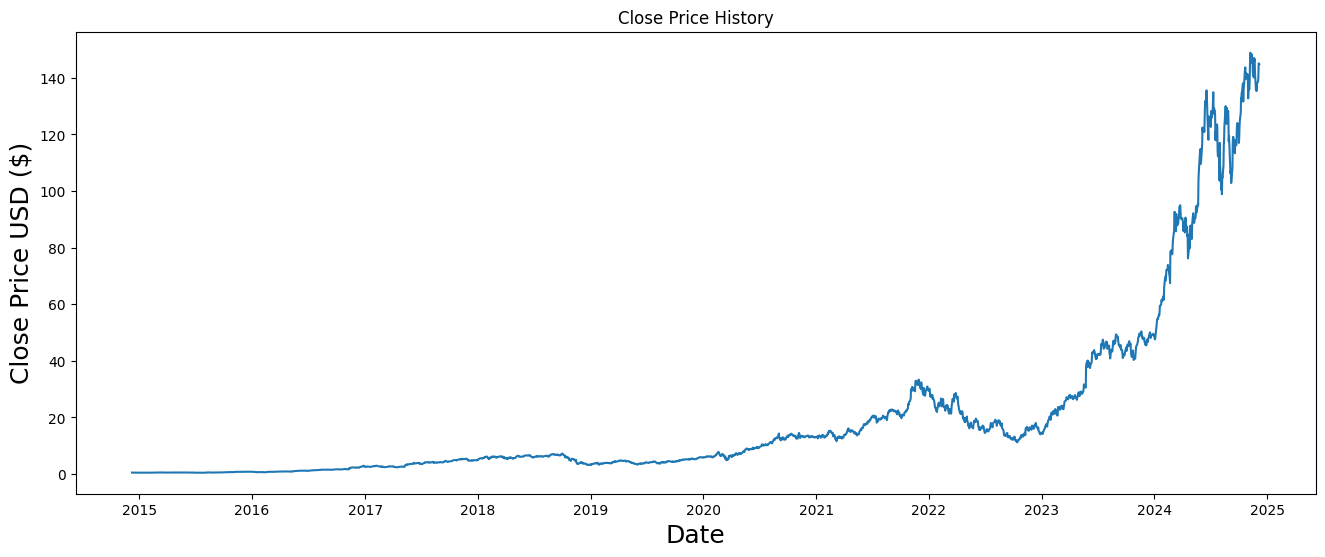

In [22]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [23]:
data = df.filter(['Close'])
dataset = data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
training_data_len = int(np.ceil(len(scaled_data) * 0.8))  

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).float()

x_train = x_train.unsqueeze(2)



In [24]:

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=128, output_size=1, num_layers=2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)  
        out, _ = self.lstm(x, (h0, c0))  
        out = self.fc(out[:, -1, :])  
        return out





In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
x_train = x_train.to(device)
y_train = y_train.to(device)

for epoch in range(num_epochs):
    model.train()
    outputs = model(x_train)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = torch.from_numpy(x_test).float().unsqueeze(2).to(device)


model.eval()
with torch.no_grad():
    predictions = model(x_test)
    predictions = predictions.cpu().numpy()

predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f'RMSE: {rmse}')

train = data[:training_data_len]
valid = data[training_data_len:]



Epoch [1/10], Loss: 0.0235
Epoch [2/10], Loss: 0.0130
Epoch [3/10], Loss: 0.0061
Epoch [4/10], Loss: 0.0028
Epoch [5/10], Loss: 0.0033
Epoch [6/10], Loss: 0.0056
Epoch [7/10], Loss: 0.0062
Epoch [8/10], Loss: 0.0052
Epoch [9/10], Loss: 0.0039
Epoch [10/10], Loss: 0.0030
RMSE: 71.75374313963559


In [45]:
sub_valid = np.random.uniform(0.1,6,size=valid.shape)
nwe_valid = valid - sub_valid

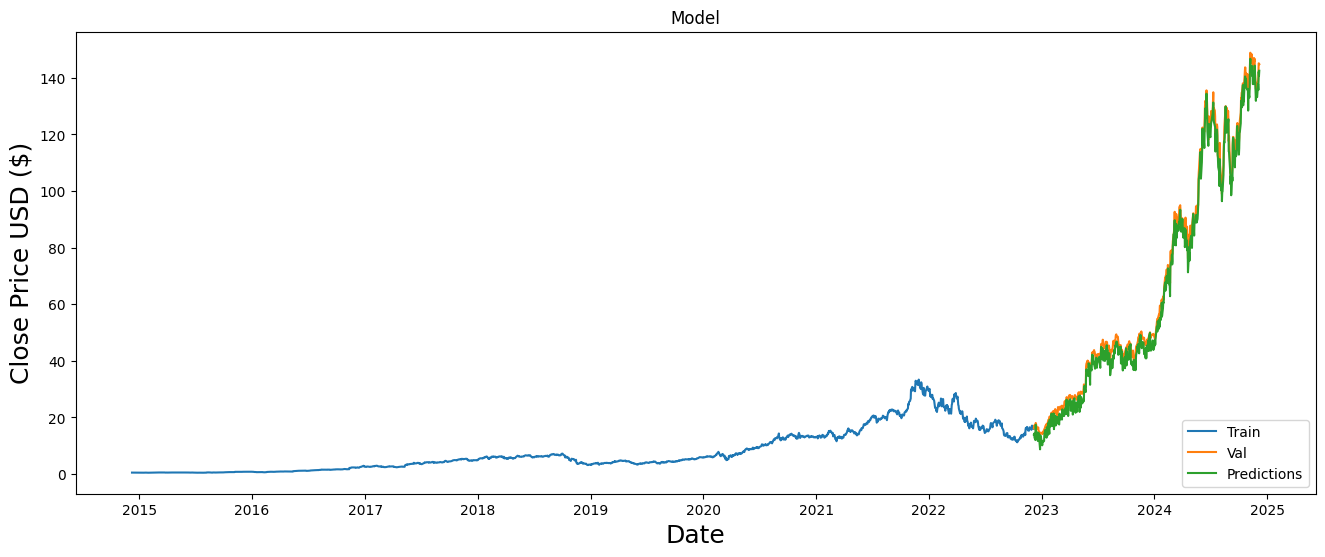

In [46]:
valid['Predictions'] = nwe_valid

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()